# General Resampling Approaches for Null Hypothesis Significance Testing

In {doc}`Section 3.3<../03-first-data/hypothesis-testing>`, I introduced Null Hypothesis Significance Testing (NHST), and we used  resampling to conduct a NHST on whether urban areas and rural areas have a significant difference in mean Covid rates. Consider again *why* we perform resampling for NHST: we have observed some difference between the groups that is captured in a test statistic, and we want to determine the probability of seeing such an extreme value of the test statistic under the null hypothesis. As discussed in  {doc}`Section 3.3<../03-first-data/hypothesis-testing>`, the test statistic comes from a random distribution, which is known as the *sampling distribution*:

````{card}
DEFINITION
^^^
```{glossary}
sampling distribution
    For some statistic of sample data, the *sampling distribution* characterizes the possible values of that statistic and the mapping of probability to those values, under some underlying assumption(s) on the population. The sampling distribution varies with the size(s) of the group(s) in the sample.
```
````

If we knew the sampling distribution of the test statistic, we could determine the probability of seeing such an extreme value of the test statistic analytically. Since we do not know the sampling distribution, we generally have two choices:
1. We can use a *model-based* approach, in which we assume that under $H_0$,  the test statistic can be modeled as coming from some known random distribution, and we infer the parameters of the distribution from the data. This approach is discussed more in {doc}`Chapter 8<../08-random-variables/intro>`. 
2. We can use a *model-free* approach, in which approximate the sampling distribution of the test statistic by resampling from the data.

This chapter focuses on the model-free approach using resampling. 
<!--For a NHST on an  observed difference of means (or any other summary statistic), the null hypothesis, $H_0$, is that the two populations being compared do not have any difference in the random distribution of the variable being considered. I.e., for the example of Covid rates, $H_0$ is that a person from either population has the same probability of getting Covid. 
-->
Let's consider a generic NHST resampling problem. We have data sets $\mathcal{A}$ and $\mathcal{B}$, each of which has some summary statistic $T_{\mathcal{A}}$ and $T_{\mathcal{B}}$. For example, the summary statistic is often the average (or sample mean). Suppose that we observe some difference in the summary statistics of the form $T_{\mathcal{A}} > T_{\mathcal{B}}$. Then we can conduct a generic NHST via resampling as follows:
1. Choose a significance level, $\alpha$, where $0< \alpha$ and $\alpha$ is much less than 1. The lower the value, the more strict our test is (in some sense that we discuss further in the next section).  
1. Determine the conditions to be tested. We have observed a **difference in some summary statistic**. Let $\Delta = T_{\mathcal{A}} - T_{\mathcal{B}}$. Then our resampling test will be to determine the **probability of seeing a difference in test statistics "at least as extreme" as** $\Delta$. (Note that I am leaving this a bit open ended right now because I want to explore this step further below.)
2. Under $H_0$, the two populations have the same random distribution for the variable of interest. Collect all the data for that variable from both populations into a single set of *pooled data*: $\mathcal{P} = \mathcal{A} \cup \mathcal{B}$.
3. Under $H_0$, the assumption is that $\mathcal{A}$ and $\mathcal{B}$ are just random samples from some larger population and the observed difference $\Delta$ is created by the fact that $\mathcal{A}$ and $\mathcal{B}$ are samples of limited size from  that population.  To determine the probability of such a large difference occurring, we conduct an $N$-iteration simulation to estimate the probability of seeing a difference as extreme as $\Delta$. We first initialize a counter $C=0$.  Then in each iteration $i,$ we:

    1. Create new samples $\mathcal{A}_i$ and $\mathcal{B}_i$, which we call *test samples*, based on $H_0$. This implies that we should draw new samples $\mathcal{A}_i$ and $\mathcal{B}_i$ from the original population; however, we do not have access to the original population. So, we use **resampling and draw the new samples from $\mathcal{P}$**. (Again, I am purposefully leaving this open-ended so that we can explore this more below.)
    2. Calculate the summary statistic for the new populations, $T_{\mathcal{A}_i}$ and $T_{\mathcal{B}_i}$.
    3. Calculate and store the difference between the summary statistics for the test data, $\Delta_i = T_{\mathcal{A}_i} - T_{\mathcal{B}_i}$. We will call this the *test difference*.
4. Evaluate what the test samples tell us about the statistical significance of the observed difference in the data.

This procedure is quite general -- you should be able to use it as a skeleton for any NHST using resampling. However, the procedure above is purposefully vague about several things:

1. What does a difference "at least as extreme" as $\Delta$ mean?
2. How should we draw test samples from the pooled data, $P$?
3. How should we evaluate statistical significance using the test differences,  $\Delta_i, ~i=0,1,\ldots, N-1$?

Each of these is considered in the following sections. However, to make the discussion more concrete, let's use the  National Longitudinal Survey of Youth 1979 (NLSY79) data set to try to answer the question "What is the effect on family wealth of schooling beyond undergraduate college?" This question is too vague to be used as a research question because it does not clearly define "the effect". We will consider two questions:
1. Does post-baccalaureate education increase mediate net family wealth?
2. Do people with post-baccalaureate education have a higher probability of becoming millionaires?

First, we consider why and how the NLSY79 might be used to answer this question. The NLSY79 is a longitudinal survey of 9,964 participants who were  14-22 when  interviewed in 1979. The survey contains detailed information on partipants' education and family wealth. In particular, the 2016 survey contains a variable T56845.00 TNFW_TRUC, which is the total net family wealth, with the top 2% of values *topcoded*. Here, *topcoded* means that the top 2% of values are each replaced with the average of those top 2% of values in order to protect the individual income values of those who lie in the to 2% of the survey group. Not that this variable is a *created* or *computed* variable, meaning that participants did not provide total family wealth directly; instead, the value is computed from answers to other survey questions about assets and liabilities. The participants in the NLSY79 cohort were 51-59. Although most people in the cohort were likely still working in 2016, most people in the cohort would have already been through the majority of their working life, and so any overall effect of post-baccalaureate education is likely to be observable in the participants.

There are also reasons that NLSY79 may not be able to answer these questions. The primary reason for this is that the US economy has shifted to have much more of a service-based and high technology emphasis in the past decades. Thus, new college graduates that are considering using statistical results from NLSY79 may find themselves in very different economic circumstances.

Note that although the NLSY79 is a longitudinal survey, we will be using it as cross-sectional data for the year 2016. As previously mentioned, this is a huge survey with thousands of variable, so we will work with only a small subset that can be used to answer our research question. These variables are:
| Reference Number | Question Name/Description | Variable title | Survey Year |
| --- | --- | --- | ---|
| R00001.00 | CASEID | IDENTIFICATION CODE | 1979 |
| T55976.00 | Q11-GENHLTH_4B | RESPONDENT GENDER | 2016 |
| T56845.00 | TNFW_TRUNC | FAMILY NET WEALTH (TRUNC) | 2016 |
| T99000.00 | HGC_EVER | HIGHEST GRADE EVER COMPLETED | XRND |

Two notes about the data in this table:
1. NLSY79 is a longitudinal cohort study, so each respondent has a unique IDENTIFICATION CODE that was established in the first year of the survey. This is why IDENTIFICATION CODE has Survey Year equal to 1979.
2. Because respondents did not provide their highest grade completed in every survey year, I elected to use the HIGHEST GRADE EVER COMPLETED variable, which is collected across all survey years. According to the [NLS Glossary](https://www.nlsinfo.org/content/getting-started/intro-to-the-nls/glossary-nls-terms/glossary-nls-terms-altogether/glossary), XRND stands for "cross-round", which implies that the data is collected from multiple survey years. (In fact, the NLS Glossary references the highest grade ever reported for the NLSY97 cohort as an example).




The NLSY79 data for the variables mentioned above was retrieved from NLS Investigator and can be loaded as follows: 

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/05-binary-hypothesis-testing/nls/nls.csv')

In [2]:
df

,R0000100,T5597600,T5684500,T9900000
0,1,-5,-5,12
1,2,2,-3,12
2,3,2,115000,12
3,4,2,112850,14
4,5,-5,-5,18
...,...,...,...,...
12681,12682,-5,-5,12
12682,12683,-5,-5,12
12683,12684,-5,-5,12
12684,12685,-5,-5,14


The column names for the data frame are the Reference Numbers with the decimal points removed. Since these are not very easy to interpret, let's rename the columns to more human-friendly versions. This can be done using the `rename()` method of the dataframe. We pass this method a dictionary that provides the map from each original column name to its new value. Here is the renaming dictionary I will use:

In [3]:
remap = {'R0000100':'CASE_ID',
         'T5597600': 'GENDER',
         'T5684500': 'NET_WEALTH',
         'T9900000': 'HIGHEST_GRADE_EVER'
        }

Then to rename columns in the dataframe, we can pass `remap` using the keyword argument `columns`. We will also specify to perform this remapping in place; i.e., it will change the columns of `df` directly:

In [4]:
df.rename(columns=remap, inplace=True)

Let's take a look at the dataframe with the new column labels:

In [5]:
df

,CASE_ID,GENDER,NET_WEALTH,HIGHEST_GRADE_EVER
0,1,-5,-5,12
1,2,2,-3,12
2,3,2,115000,12
3,4,2,112850,14
4,5,-5,-5,18
...,...,...,...,...
12681,12682,-5,-5,12
12682,12683,-5,-5,12
12683,12684,-5,-5,12
12684,12685,-5,-5,14


Note that some of the entries in the dataframe are less than 0. For instance, for `CASE_ID==1`:

In [6]:
df.query('CASE_ID==1')

,CASE_ID,GENDER,NET_WEALTH,HIGHEST_GRADE_EVER
0,1,-5,-5,12


Both the `GENDER` and `NET_WEALTH` entries are negative. When I downloaded this data from NLS Investigator, I chose to include a *codebook* that provides information on how to interpret the results: [Codebook for NLSY79 Data on Wealth vs Education](https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/05-binary-hypothesis-testing/nls/nls.cdb). Note that -5 indicates that respondent was not interviewed in that year. A value of -3 is an "Invalid Skip", which indicates that the respondent should have answered the question but did not. We will filter the data to only preserve those entries that have valid values for `NET_WEALTH` and `HIGHEST_GRADE_EVER`. We do this by using a logical *and* on the conditions that the value of `NET_WEALTH` is positive and the value of `HIGHEST_GRADE_EVER` is positive:

In [7]:
df2=df.query('HIGHEST_GRADE_EVER > 0 & NET_WEALTH>0') 

In [8]:
df2

,CASE_ID,GENDER,NET_WEALTH,HIGHEST_GRADE_EVER
2,3,2,115000,12
3,4,2,112850,14
5,6,1,95825,16
7,8,2,172717,14
8,9,1,679000,14
...,...,...,...,...
12565,12566,2,88000,14
12588,12589,1,249280,13
12642,12643,1,26900,12
12662,12663,1,62000,13


Note that the number of rows has dropped from 12,686 to 4,774.

Before carrying out any statistical tests, we will do some initial data exploration. Let's first create a scatter plot of net wealth as a function of highest grade ever completed:

In [9]:
import matplotlib.pyplot as plt

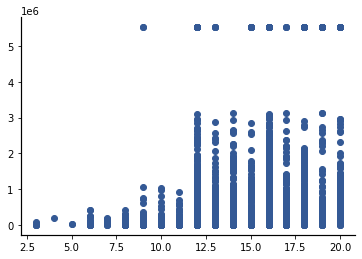

In [10]:
plt.scatter(df2['HIGHEST_GRADE_EVER'], df2['NET_WEALTH']);

To make progress toward answering our research question, let's extract the data for two groups:
* We will consider students with 16 or 17 years of education as having undergraduate education and place their data into a dataframe called `undergrad`.
* We will consider students with 18 or more years of education as having post-baccalaureate or graduate education and place their data into a data frame called `grad`.

In [11]:
undergrad = df2.query('HIGHEST_GRADE_EVER >= 16 & HIGHEST_GRADE_EVER <=17')                

In [12]:
grad = df2.query('HIGHEST_GRADE_EVER >= 18')

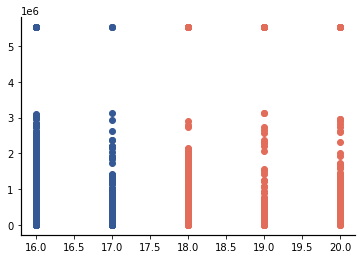

In [13]:
plt.scatter(undergrad['HIGHEST_GRADE_EVER'], undergrad['NET_WEALTH']);
plt.scatter(grad['HIGHEST_GRADE_EVER'], grad['NET_WEALTH']);

At first glance, the data looks very similar. Part of this is because the high values of net wealth have been top-coded, as discussed above. If we look at the maximum value for each group, we will see they are the same top-coded value (approximately $5.5 million):

In [14]:
undergrad['NET_WEALTH'].max(), grad['NET_WEALTH'].max()

(5526252, 5526252)




Let's check the median wealth in each of these groups:

In [15]:
undergrad['NET_WEALTH'].median(), grad['NET_WEALTH'].median()

(427000.0, 484400.0)

You may wonder why I chose to use the *median* here instead of the average (or sample mean). The reason is that the top coding may cause the average value to not be accurate. In particular, let's suppose that the undergrad group has billionaires but the grad group does not. Both sets of values are top coded to the same value, but the actual sample means for the two groups could be very different.

The median value for the `grad` group is higher than the `undergrad` group by

In [16]:
delta_median = grad['NET_WEALTH'].median() -undergrad['NET_WEALTH'].median()
print(delta_median)

57400.0


Let's also consider the relative frequency of millionaires in each group:

In [17]:
R_undergrad = len(undergrad.query('NET_WEALTH > 1_000_000')) / len(undergrad)
print(R_undergrad)

0.24482338611449453


In [18]:
R_grad = len(grad.query('NET_WEALTH > 1_000_000')) / len(grad)
print(R_grad)

0.29809725158562367


The relative frequency of millionaires in the `grad` group is higher than in the `undergrad` group by 

In [19]:
delta_M_freq = R_grad - R_undergrad
print(delta_M_freq)

0.05327386547112914


Note that the difference is a positive value. We will always achieve this by putting the group with the larger summary statistic first in the difference equation.

We can use NHST to answer the following questions:
1. Is the observed increase in median wealth ($\Delta = 57,400$) between the undergrad and grad groups statistically significant?
2. Is the observed increase in the relative frequency of millionaires between the undergrad and grad groups ($\Delta \approx 0.053$) statistically significant?



Note that for both cases, we need to sample from the same pooled data: the net family wealth from both the `undergrad` and `grad` groups. Since these correspond to all students with at least 16 years of education, we can create the pooled data as follows: 

In [20]:
pooled = df2.query('HIGHEST_GRADE_EVER >= 16')

In the next sections, we answer both these questions by applying different approaches to resample from this pooled data, to determine whether a result is "at least as extreme" as the observed one, and to determine statistical significance.